# Shengping Jiang
<br>
Springboard ML course unit 20.5 Capstone Submissions 2<br>
Machine Learning Engineering Career Track Capstone: Machine Learning / Deep Learning Prototype<br>

Capstone project: This project will build a ML application for recognizing people with masked face. It is a research project.
Goals of the project:
* Able to recognize a person as same person when he/she is with or without a mask, from a webcam or IP camera
* It will be deploymented as a web application or a off-line application (Windows version or/and Linux version)
* It can be used in a small or middle size company for general entry management

This submission shows how the model training and test can be scaled <br>
We use a game laptop with GPU NVIDIA RTX 2070. Proceess 200-300 training images.<br>
The model works more than thousand images when GPU is capable enough

                               Development approach

1 Collect images of people with mask and without mask<br>
2 Use Dlib CNN face detector to detect face from images. Use Dlib 128D vector(face) generated from each sample image as train/test data<br>
3 Use K Nearst Neighbors(KNN) model as face recognition model<br>
4 First will train KNN with only masked face images. I split images data as two groups of train and test. In the train group, it has nine people folders. Each person has 7-16 picture. The test group put all images in one folder. Those images are not used for training<br>
5 Adjust parameters/models<br>
Face detector: HOG, CNN<br>
KNN model: Number of neighbors. weights: {‘uniform’, ‘distance’}. algorithm: {‘ball_tree’, ‘kd_tree’, ‘brute’}. <br>
Trained model: distance threshold: {0.6, 0.5, 0.4}. Bascally 0.6 can be considered as same person<br>


                  Evaluation Matrix of Face Recognition Project									



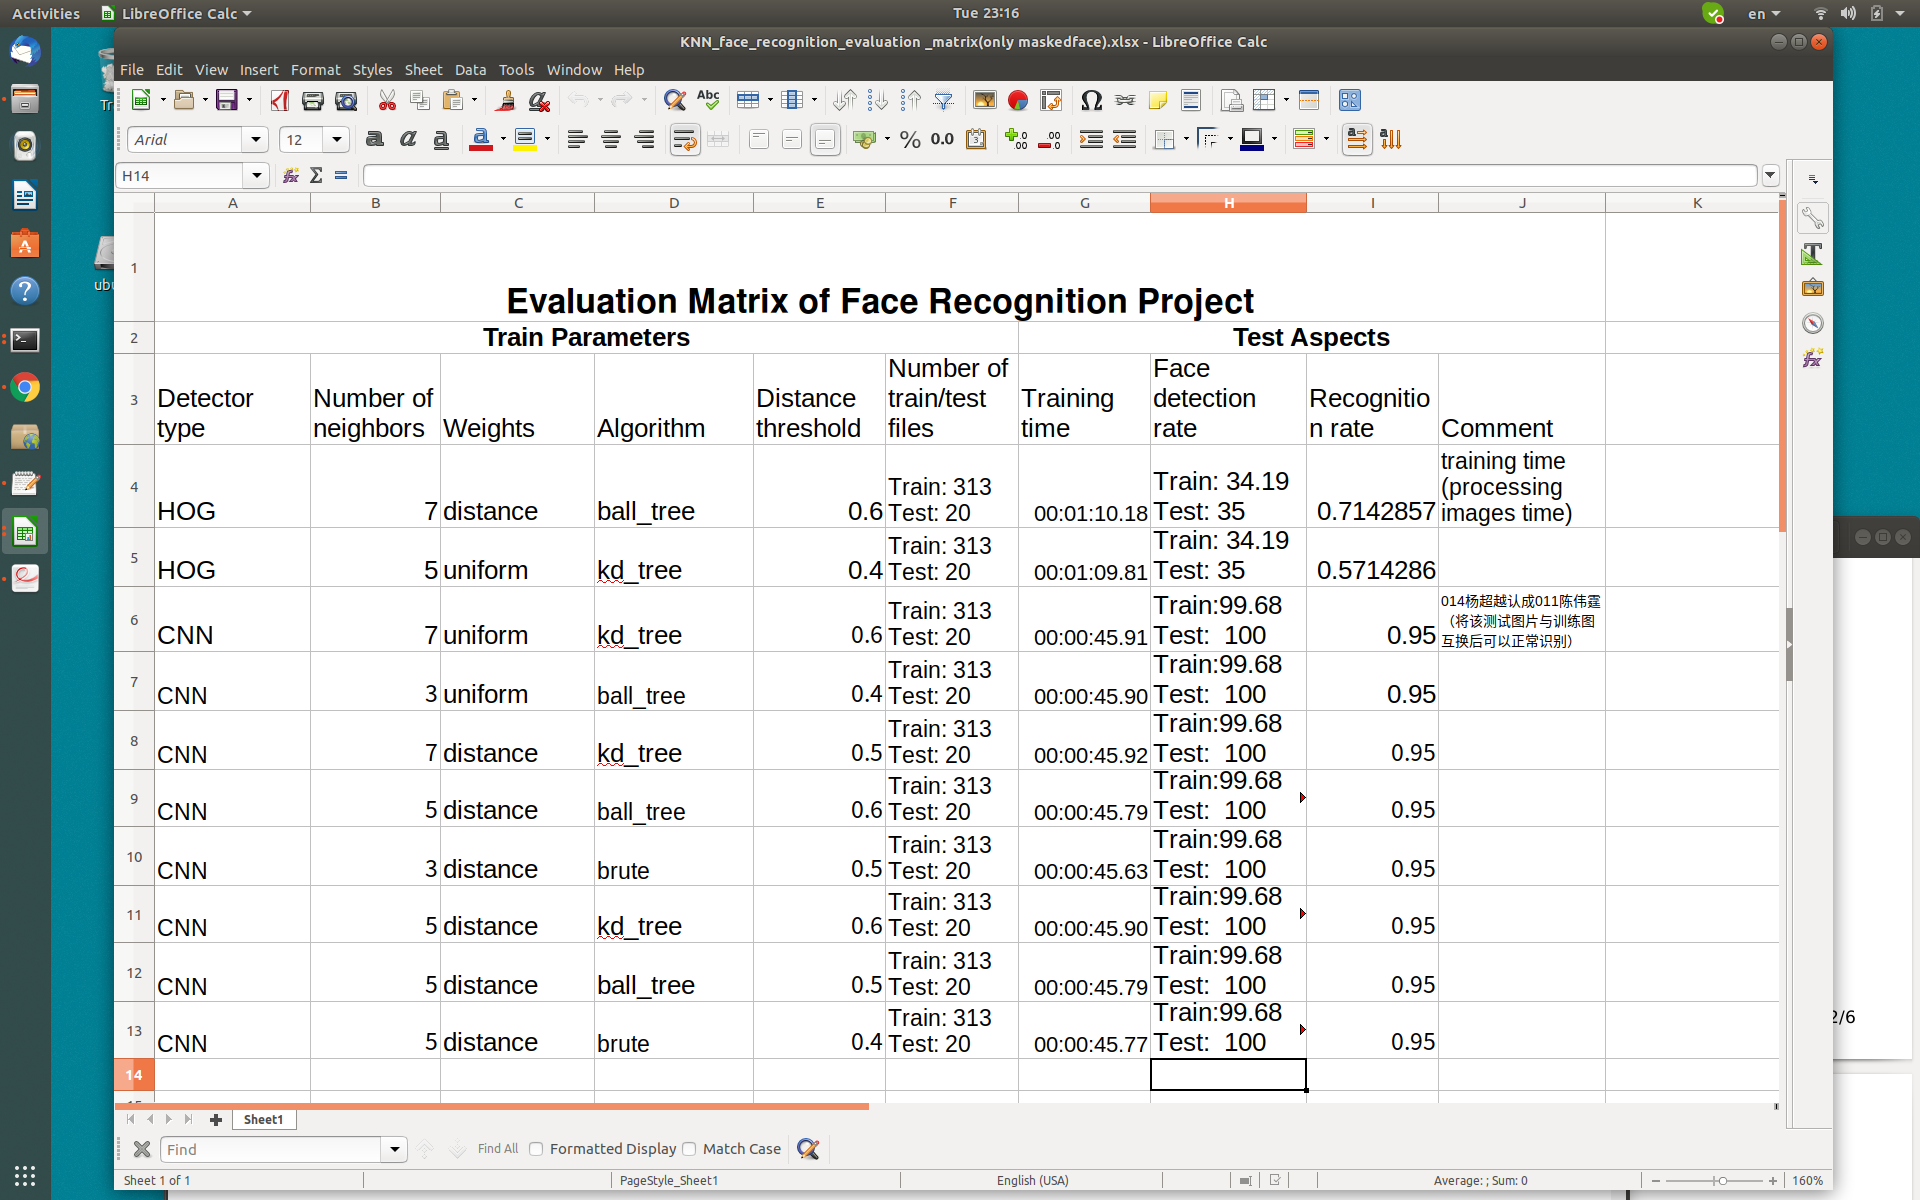

In [1]:
# jsp_kneighbors_face.ipynb
# Use face_recognition to identify masked face
import numpy as np
import os
import face_recognition as frg
from sklearn.neighbors import KNeighborsClassifier
import re
import math
import matplotlib.pyplot as plt

In [2]:
# We define a train function

def kntrain(X, y, neighbors, kn_alg, weight):
    if neighbors is None:
        neighbors = int(math.sqrt(len(X)))
    klf1 = KNeighborsClassifier(algorithm=kn_alg, n_neighbors=neighbors, weights=weight)
    .fit(X,y)
    return klf1, neighbors            

In [10]:
# Train KNN model
# Create training matrix X, y
from timeit import default_timer as timer
from datetime import timedelta
start = timer()

extension = ['jpg','png','bmp','jpeg']
X =[]
y =[]

tfiles = 0  #Total number of train files        #训练文件数目
dfiles = 0  #Number of files detected face

for (root,dirs,files) in os.walk('maskedface'):
    pattern = '^\w+/train/\w+'
    if re.match(pattern, root):
        print('root:',root)
        print('files:',files)
        label0 = root.split('/')[-1]
        for imgf in files:
            imgf = imgf.lower()
            if imgf.split('.')[1] in extension:
                imgpath = os.path.join(root, imgf)
                tfiles += 1
                npimg = frg.load_image_file(imgpath, mode='RGB')
                # Use model='hog' for non-masked face. Use model='cnn' for masked face
                #f_location = frg.face_locations(npimg, model='hog')
                
                f_location = frg.face_locations(npimg, model='cnn')    #修改cnn或hog
                
                #print('imgpath:',imgpath)
                #print('label0:',label0)                
                if len(f_location) == 1:
                    print('fpath:',imgpath)
                    print('f_location:',f_location)   
                    f_encord = frg.face_encodings(npimg,known_face_locations=f_location)[0]
                    X.append(f_encord)
                    y.append(label0)
                    dfiles += 1
                else:
                    print('Incorrect face image!')    
            else:
                print('File $s has wrong format' % imgf)

end = timer()
print('Processing images elapsed time:',timedelta(seconds=end-start))

#Adjust neighbors, kn_alg(Algorithm), weight
klf, neighbor = kntrain(X, y, neighbors=None, weight='distance', kn_alg='ball_tree') #修改number或tree或weight

print('Number of neighbors:', neighbor)
print('Face detection rate of train samples:', (dfiles/tfiles))
print('Number of train sample files:', tfiles)
end = timer()
print('Train procedure elapsed time:',timedelta(seconds=end-start))


root: maskedface/train/007杨幂
files: ['022.jpg', '017.jpg', '020.jpg', '009.jpg', '018.jpg', '019.jpg', '012.jpg', '008.jpg', '007.jpg', '004.jpg', '013.jpg', '014.jpg', '016.jpg', '011.jpg', '010.jpg', '006.jpg', '005.jpg', '015.jpg', '001.jpg', '003.jpg', '002.jpg', '021.jpg']
fpath: maskedface/train/007杨幂/022.jpg
f_location: [(118, 286, 236, 168)]
fpath: maskedface/train/007杨幂/017.jpg
f_location: [(88, 223, 157, 154)]
fpath: maskedface/train/007杨幂/020.jpg
f_location: [(81, 280, 199, 162)]
fpath: maskedface/train/007杨幂/009.jpg
f_location: [(80, 269, 250, 99)]
fpath: maskedface/train/007杨幂/018.jpg
f_location: [(58, 243, 126, 175)]
fpath: maskedface/train/007杨幂/019.jpg
f_location: [(152, 558, 234, 476)]
fpath: maskedface/train/007杨幂/012.jpg
f_location: [(201, 327, 370, 157)]
fpath: maskedface/train/007杨幂/008.jpg
f_location: [(99, 267, 240, 125)]
fpath: maskedface/train/007杨幂/007.jpg
f_location: [(118, 250, 236, 132)]
fpath: maskedface/train/007杨幂/004.jpg
f_location: [(115, 262, 233, 144

fpath: maskedface/train/014杨超越/020.jpg
f_location: [(52, 377, 150, 279)]
fpath: maskedface/train/014杨超越/009.jpg
f_location: [(64, 424, 182, 306)]
fpath: maskedface/train/014杨超越/018.jpg
f_location: [(79, 378, 221, 236)]
fpath: maskedface/train/014杨超越/019.jpg
f_location: [(124, 397, 222, 299)]
fpath: maskedface/train/014杨超越/012.jpg
f_location: [(76, 351, 158, 269)]
fpath: maskedface/train/014杨超越/008.jpg
f_location: [(28, 392, 127, 294)]
fpath: maskedface/train/014杨超越/007.jpg
f_location: [(133, 390, 336, 186)]
fpath: maskedface/train/014杨超越/004.jpg
f_location: [(179, 473, 383, 269)]
fpath: maskedface/train/014杨超越/013.jpg
f_location: [(138, 224, 280, 82)]
fpath: maskedface/train/014杨超越/014.jpg
f_location: [(138, 410, 280, 269)]
fpath: maskedface/train/014杨超越/016.jpg
f_location: [(57, 396, 226, 226)]
fpath: maskedface/train/014杨超越/023.jpg
f_location: [(133, 349, 274, 208)]
fpath: maskedface/train/014杨超越/011.jpg
f_location: [(216, 411, 385, 241)]
fpath: maskedface/train/014杨超越/010.jpg
f_loca

fpath: maskedface/train/010吴磊/018.jpg
f_location: [(118, 424, 236, 306)]
fpath: maskedface/train/010吴磊/019.jpg
f_location: [(88, 435, 206, 318)]
fpath: maskedface/train/010吴磊/012.jpg
f_location: [(54, 304, 172, 186)]
fpath: maskedface/train/010吴磊/008.jpg
f_location: [(100, 376, 218, 258)]
fpath: maskedface/train/010吴磊/007.jpg
f_location: [(166, 852, 459, 559)]
fpath: maskedface/train/010吴磊/004.jpg
f_location: [(251, 184, 393, 43)]
fpath: maskedface/train/010吴磊/013.jpg
f_location: [(74, 351, 156, 269)]
fpath: maskedface/train/010吴磊/014.jpg
f_location: [(166, 912, 459, 618)]
fpath: maskedface/train/010吴磊/016.jpg
f_location: [(64, 280, 182, 162)]
fpath: maskedface/train/010吴磊/011.jpg
f_location: [(59, 432, 229, 262)]
fpath: maskedface/train/010吴磊/010.jpg
f_location: [(265, 2261, 1141, 1385)]
fpath: maskedface/train/010吴磊/006.jpg
f_location: [(85, 172, 125, 133)]
fpath: maskedface/train/010吴磊/005.jpg
f_location: [(54, 248, 153, 150)]
fpath: maskedface/train/010吴磊/015.jpg
f_location: [(125,

In [11]:
# Create test image list
Xt=[]   #Test images encoding
ft=[]   #Test image file path
lt=[]   #Face location in image
ttfiles = 0  #Number of test files

for (root,dirs,files) in os.walk('maskedface/test'):
    if (files!=""):
        for f1 in files:
            label1 = f1.split('.')[0]
            f1path = os.path.join(root,f1)
            f1img = frg.load_image_file(f1path, mode='RGB')
            ttfiles += 1
            
            # Use model='hog' for non-masked face. Use model='cnn' for masked face
            #f_location = frg.face_locations(npimg, model='hog')
            f_locations = frg.face_locations(f1img, model='cnn')
            
            f_encodings = frg.face_encodings(f1img, known_face_locations=f_locations)
            print('len(f_locations):',len(f_locations))
            for i in range(len(f_encodings)):
                Xt.append(f_encodings[i])
                lt.append(f_locations[i])
                ft.append(f1path)
print(len(Xt))
print(len(lt))
print(ft)
print('Number of test sample files:', ttfiles)
print('Face detection rate of test sample:', (len(Xt)/ttfiles))

len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
20
20
['maskedface/test/019江疏影.jpg', 'maskedface/test/009邓紫棋.jpg', 'maskedface/test/006海涛.jpg', 'maskedface/test/010吴磊.jpg', 'maskedface/test/004郭坚.jpg', 'maskedface/test/002艾克米.jpg', 'maskedface/test/011陈伟霆.jpg', 'maskedface/test/007杨幂.jpg', 'maskedface/test/013鹿晗.jpg', 'maskedface/test/005易烊千玺.jpg', 'maskedface/test/017迪丽热巴.jpg', 'maskedface/test/003艾克米.jpg', 'maskedface/test/001艾克米.jpg', 'maskedface/test/014杨超越.jpg', 'maskedface/test/016马天宇.jpg', 'maskedface/test/008关晓彤.jpg', 'maskedface/test/012周杰伦.jpg', 'maskedface/test/018杨洋.jpg', 'maskedface/test/020胡一天.jpg', 'maskedface/test/015郑爽.jpg'

In [12]:
# This funcation can show the real image size inline, and draw label text
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def show_labels_on_image2(img_path, location, label_index):
    pil_image = Image.open(img_path).convert("RGB")
    (top,right, bottom, left) = location
    name = y[label_index]     # get predicted name
    #name = name.encode("UTF-8")
    draw = ImageDraw.Draw(pil_image)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    # Define font type and size. The font file is in my ubuntu 18.04. Font size is 14
    font_file = '/usr/share/fonts/truetype/freefont/FreeSansBold.ttf'
    font = ImageFont.truetype(font_file, 16)
    text_w,text_h = font.getsize(name)
    #text_width, text_height = draw.textsize(name)
    
    draw.text((left + 5, bottom + text_h), name, font=font, fill=(255, 255, 255, 255))

    #Below will pop up a image window
    #pil_image.show()
    #Below shows image inline
    display(pil_image)

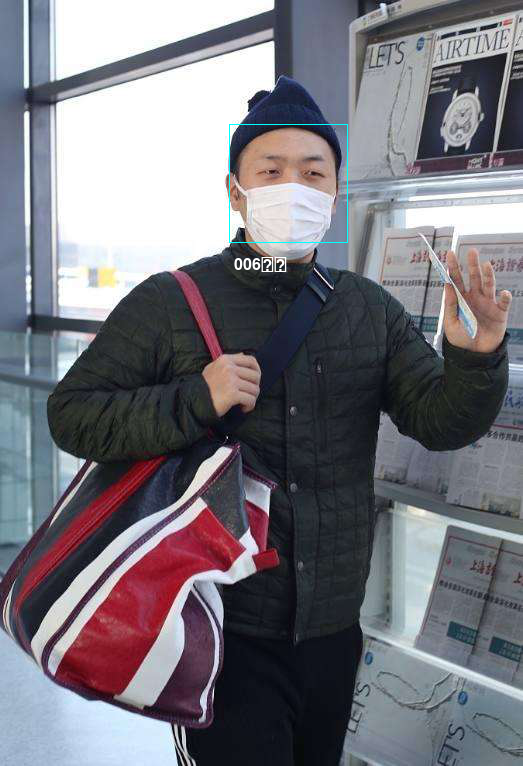

Test image: maskedface/test/006海涛.jpg


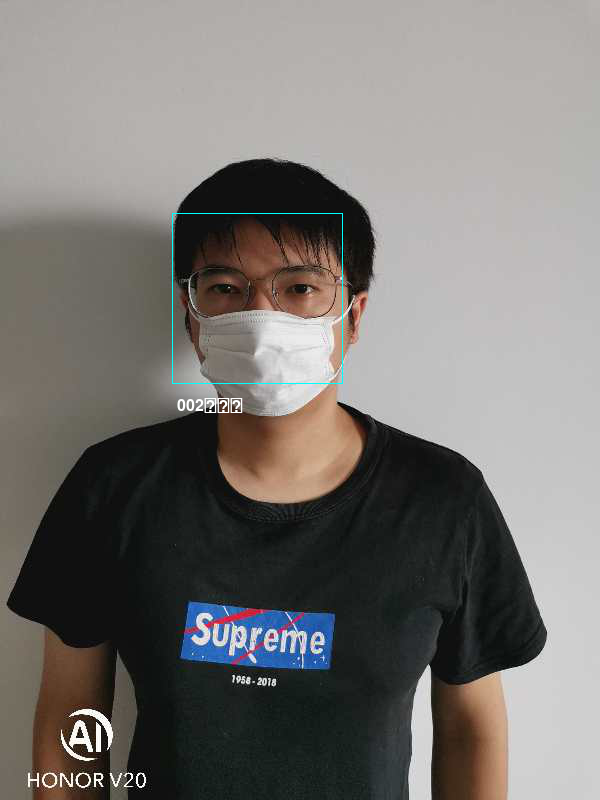

Test image: maskedface/test/002艾克米.jpg


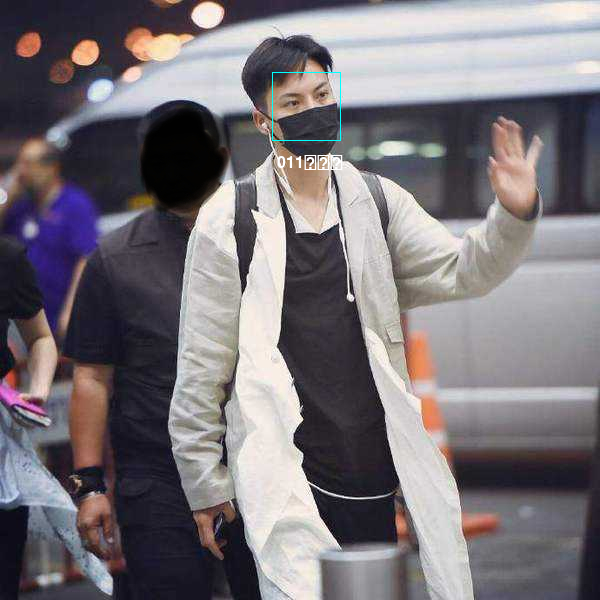

Test image: maskedface/test/011陈伟霆.jpg


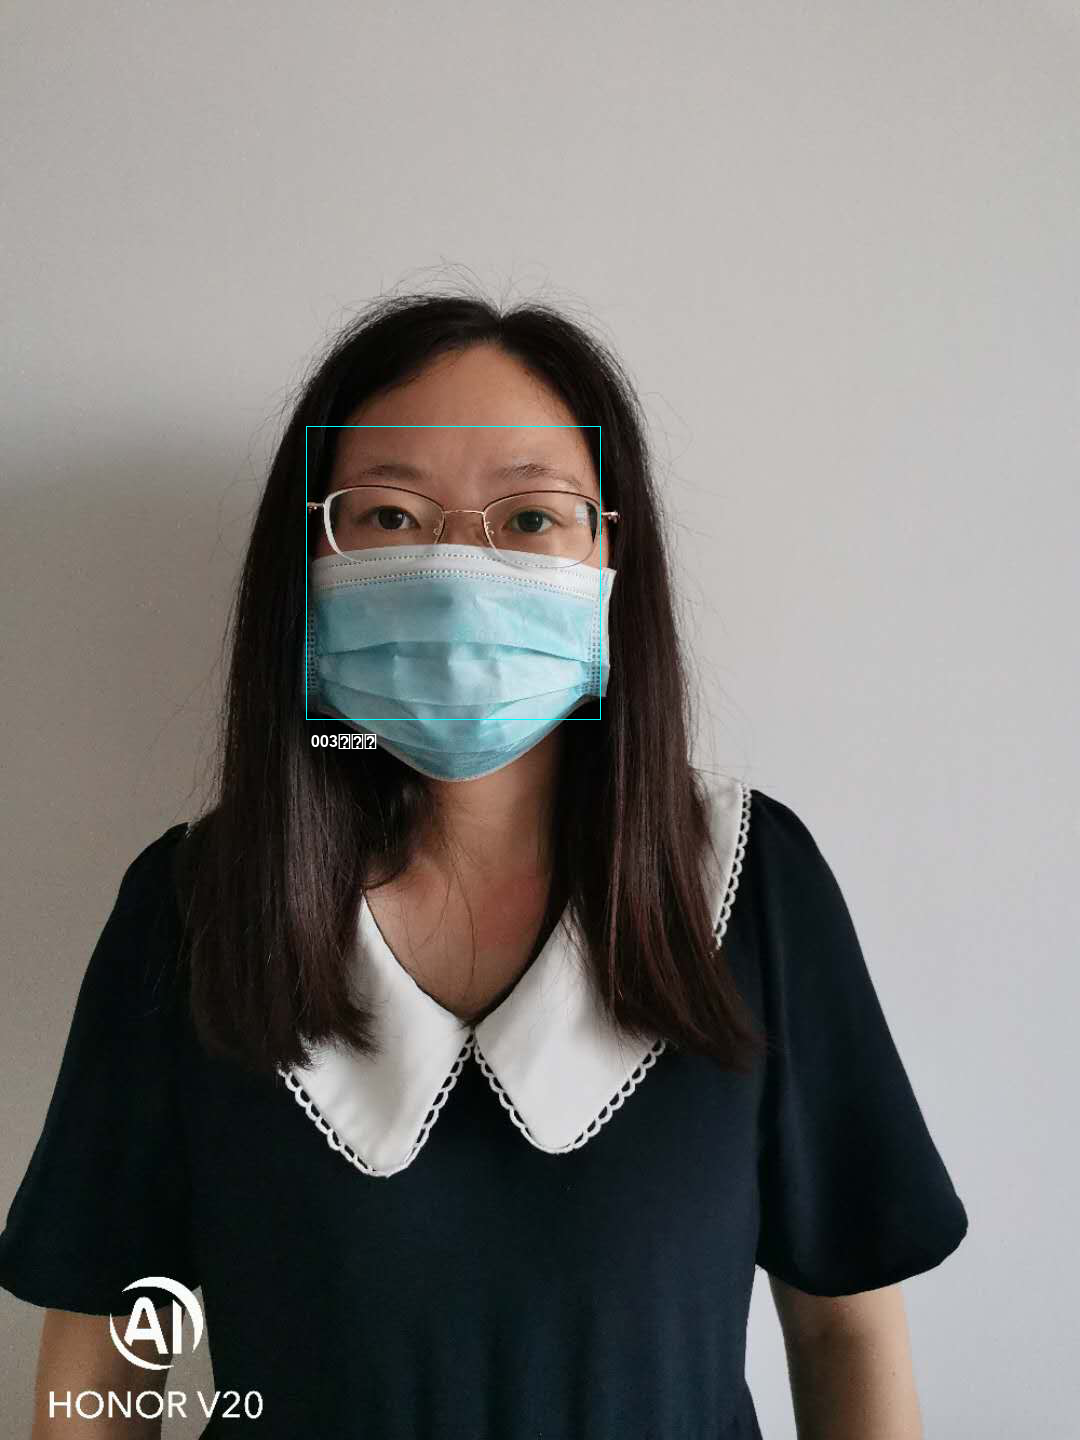

Test image: maskedface/test/003艾克米.jpg


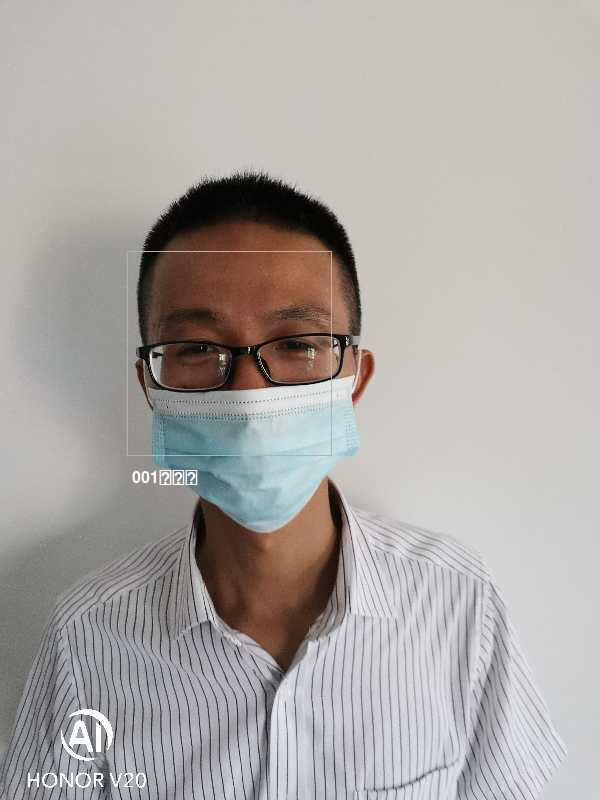

Test image: maskedface/test/001艾克米.jpg


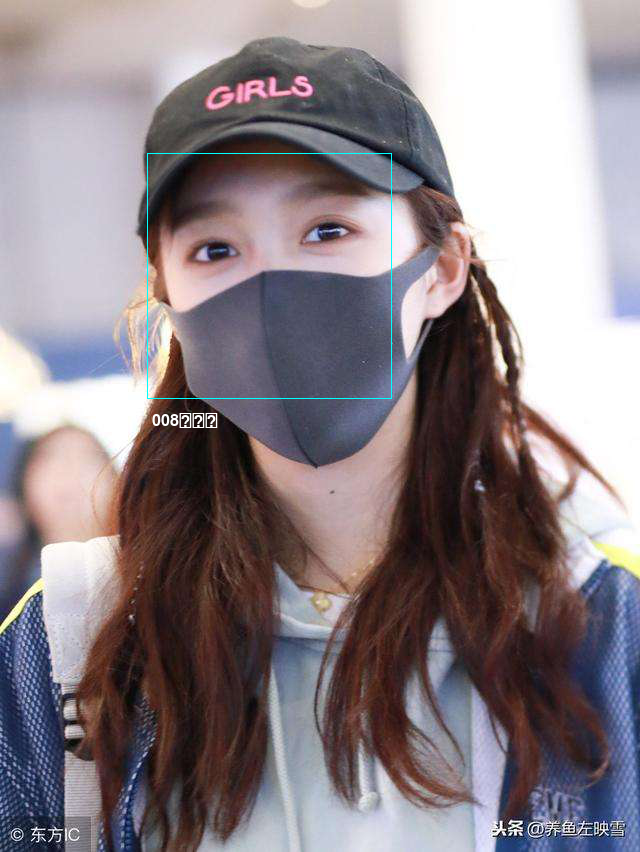

Test image: maskedface/test/008关晓彤.jpg


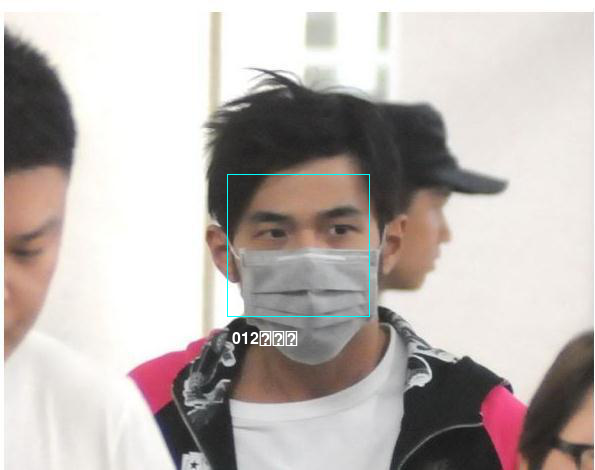

Test image: maskedface/test/012周杰伦.jpg
Face recognition rate: 0.35


In [17]:
# Test all images on trained knn model
dist_threshold = 0.3
face_recog_rate = 0
for i in range(len(Xt)):
    xt = Xt[i].reshape(1,-1)
    closest_distance = klf.kneighbors(xt, n_neighbors=1, return_distance=True)
    if closest_distance[0][0][0] <= dist_threshold:
        # Below closest_distance[1][0][0] is label (y) indices
        show_labels_on_image2(ft[i], lt[i], closest_distance[1][0][0])
        print('Test image:', ft[i])
        name = y[closest_distance[1][0][0]]     # get predicted name
        if ft[i].find(name) != -1:
            face_recog_rate += 1
print('Face recognition rate:', face_recog_rate/len(Xt))

In [14]:
print('Number of neighbors:', neighbor)
print('Distance threshold',dist_threshold)
print('Number of train sample files:', tfiles)
print('Number of test sample files:', ttfiles)
print('Processing images elapsed time:',timedelta(seconds=end-start))
print('Face detection rate of train samples:', (dfiles/tfiles))
print('Face detection rate of test sample:', (len(Xt)/ttfiles))
print('Face recognition rate:', face_recog_rate/len(Xt))

Number of neighbors: 14
Distance threshold 0.6
Number of train sample files: 205
Number of test sample files: 20
Processing images elapsed time: 0:00:33.617076
Face detection rate of train samples: 1.0
Face detection rate of test sample: 1.0
Face recognition rate: 0.65
